# AIPI 590 - XAI | Assignment #4
### Hongxuan Li

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1EfgVK4j4OFZ-b9owFmaa4-NhmzVy2LWG)

#### References

- dataset https://christophm.github.io/interpretable-ml-book/bike-data.html
- imodels

# Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imodels import RuleFitClassifier, BoostedRulesClassifier, HSTreeClassifierCV
from sklearn.preprocessing import LabelEncoder
import re
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
seed = 42

# Dataset 


### Information

The UCI Adult Income Dataset is a popular binary classification dataset used for predicting whether an individual's annual income exceeds $50,000 based on census data. It contains 48,842 instances with 14 input features and 1 target variable.

**Features**


1. **age**: Continuous variable representing the age of the individual in years.

2. **workclass**: Categorical variable indicating the type of employer or work sector. Possible values include Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3. **fnlwgt (final weight)**: Continuous variable representing the number of people the census believes the entry represents. It's used for statistical analyses to ensure the data is representative of the population.

4. **education**: Categorical variable describing the highest level of education achieved. Categories include Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5. **education-num**: Continuous variable indicating the number of years of education completed.

6. **marital-status**: Categorical variable describing marital status. Categories include Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7. **occupation**: Categorical variable representing the individual's occupation. Examples include Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8. **relationship**: Categorical variable indicating the individual's role in the family. Categories include Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9. **race**: Categorical variable describing the person's race. Categories include White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10. **sex**: Categorical variable indicating gender (Male or Female).

11. **capital-gain**: Continuous variable representing capital gains in dollars.

12. **capital-loss**: Continuous variable representing capital losses in dollars.

13. **hours-per-week**: Continuous variable indicating the number of hours worked per week.

14. **native-country**: Categorical variable representing the country of origin. Examples include United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**Target Variable (Binary):**

15. **income**: binary (>50K, <=50K)


### Load Dataset

In [3]:

# Load data
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load the training data
train_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
train_df = pd.read_csv(train_data_url, names=column_names, sep=', ', engine='python', na_values='?')

# Load the test data
test_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
test_df = pd.read_csv(test_data_url, names=column_names, sep=', ', engine='python', skiprows=1, na_values='?')

# Remove leading space
test_df['income'] = test_df['income'].str.strip()

train_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Curate Train Features and Target

In [4]:
# Convert income labels to 0 and 1
train_df['income'] = train_df['income'].map({'>50K': 1, '<=50K': 0})
test_df['income'] = test_df['income'].map({'>50K': 1, '<=50K': 0})

In [6]:
# get features and target
X = train_df.drop('income', axis=1)
y = train_df['income']


# convert categorical variables to numerical variables
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}  # Dictionary to store encoders for each column
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the fitted LabelEncoder for each column 

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# RuleFit

![RuleFit](./attachments/RuleFit.png)

In [7]:
# Train the model
model = RuleFitClassifier()
model.fit(X_train, y_train)

RuleFitClassifier()

In [8]:
# Evaluate the model
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test.values, y_pred)
print(f'Mean Squared Error: {auc:.2f}')


Mean Squared Error: 0.72


In [9]:
# get rule importances
rule_df = model.visualize()
rule_df["abs_coef"] = rule_df["coef"].abs()
rule_df = rule_df.sort_values(by='abs_coef', ascending=False)
rule_df.iloc[:, [0, 1]]

,rule,coef
27,capital-gain <= 5095.5 and capital-loss <= 1824.5,-1.48
14,capital-gain <= 7139.5 and relationship <= 4.5 and relationship > 0.5,-0.86
16,capital-gain <= 7073.5 and relationship <= 4.5 and relationship > 0.5,-0.70
23,capital-gain <= 7073.5 and capital-loss <= 1772.0 and hours-per-week <= 41.0 and relationship <= 4.5,-0.68
20,age <= 33.5 and capital-gain <= 6376.5,-0.49
18,capital-gain <= 7024.0 and relationship <= 4.5 and relationship > 0.5,-0.48
24,capital-gain <= 4243.5 and education-num <= 12.5,-0.41
21,age <= 35.5,-0.37
29,capital-gain <= 7073.5,-0.35
9,sex,0.27


### Interpretation of Rules

- Family Role ('relationship'): Conditions like "relationship <= 1" might include specific family roles such as 'Husband' or 'Wife', indicating their ability to achieve higher income levels compared to roles like 'Not-in-family' or 'Unmarried'.

- Education ('education-num'): A higher value in 'education-num', reflecting more years of education completed, correlates strongly with incomes exceeding $50,000

- Occupation: Specific occupations such as 'Exec-managerial' or 'Prof-specialty' are likely linked to higher income thresholds

In [10]:
# interpret rules
def interpret_rules(df, label_encoders):
    interpretations = []
    
    for _, row in df.iterrows():
        rule = row['rule']
        coef = row['coef']
        
        # Extract column names and conditions
        conditions = re.findall(r'(\w+(?:-\w+)*)\s*([<>=]+)\s*([\d.]+)', rule)
        
        interpretation = f"Rule {row.name}: "
        for col, op, value in conditions:
            if col in label_encoders:
                # Handle categorical variables
                encoded_value = float(value)
                if col == 'relationship':
                    # Special handling for relationship
                    if op == '<=' and encoded_value > 1:
                        interpretation += f"{col} is one of {label_encoders[col].inverse_transform(range(int(encoded_value)))}; "
                    elif op == '>' and encoded_value < 1:
                        interpretation += f"{col} is one of {label_encoders[col].inverse_transform(range(int(encoded_value)+1, len(label_encoders[col].classes_)))}; "
                else:
                    # For other categorical variables
                    original_value = label_encoders[col].inverse_transform([int(float(value))])[0]
                    interpretation += f"{col} is {original_value}; "
            else:
                # Handle numerical variables
                interpretation += f"{col} {op} {value}; "
        
        interpretation += f"Impact: {coef}"
        interpretations.append(interpretation)
    
    return interpretations
interpretations = interpret_rules(rule_df, label_encoders)
for interp in interpretations:
    print(interp)

Rule 27: capital-gain <= 5095.5; capital-loss <= 1824.5; Impact: -1.48
Rule 14: capital-gain <= 7139.5; relationship is one of ['Husband' 'Not-in-family' 'Other-relative' 'Own-child']; relationship is one of ['Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']; Impact: -0.86
Rule 16: capital-gain <= 7073.5; relationship is one of ['Husband' 'Not-in-family' 'Other-relative' 'Own-child']; relationship is one of ['Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']; Impact: -0.7
Rule 23: capital-gain <= 7073.5; capital-loss <= 1772.0; hours-per-week <= 41.0; relationship is one of ['Husband' 'Not-in-family' 'Other-relative' 'Own-child']; Impact: -0.68
Rule 20: age <= 33.5; capital-gain <= 6376.5; Impact: -0.49
Rule 18: capital-gain <= 7024.0; relationship is one of ['Husband' 'Not-in-family' 'Other-relative' 'Own-child']; relationship is one of ['Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']; Impact: -0.48
Rule 24: capital-gain <= 4243.5; educati

# Boosted rule set

![BoostTree](./attachments/BoostTree.png)

In [131]:
# fit model on training data
clf = BoostedRulesClassifier(n_estimators=15)
clf.fit(X_train, y_train)
feat_names = X_train.columns.tolist()


In [130]:
# Evaluate the model
from sklearn.metrics import roc_auc_score
y_pred = clf.predict(X_test)
auc = roc_auc_score(y_test.values, y_pred)
print(f'Prediction AUC score: {auc:.2f}')


Prediction AUC score: 0.76


### Interpretation of Trees

- Work Hours ('hours-per-week'): Working more than 40.5 hours per week (Tree 5) and more than 31.5 hours per week (Tree 8) both predict higher incomes, emphasizing that longer working hours lead to higher earnings.

- Education ('education-num'): Individuals with less than 12.5 years of education (Tree 1) generally earn <= $50K, while more education correlates with higher income. A similar pattern is seen with a 7.5-year education threshold in Tree 7, reinforcing that more education boosts earning potential.

- Age: People younger than 28.5 years (Trees 4 and 14) and 36.5 years (Tree 13) are more likely to earn <= $50K, showing that higher age and experience are linked to higher incomes.

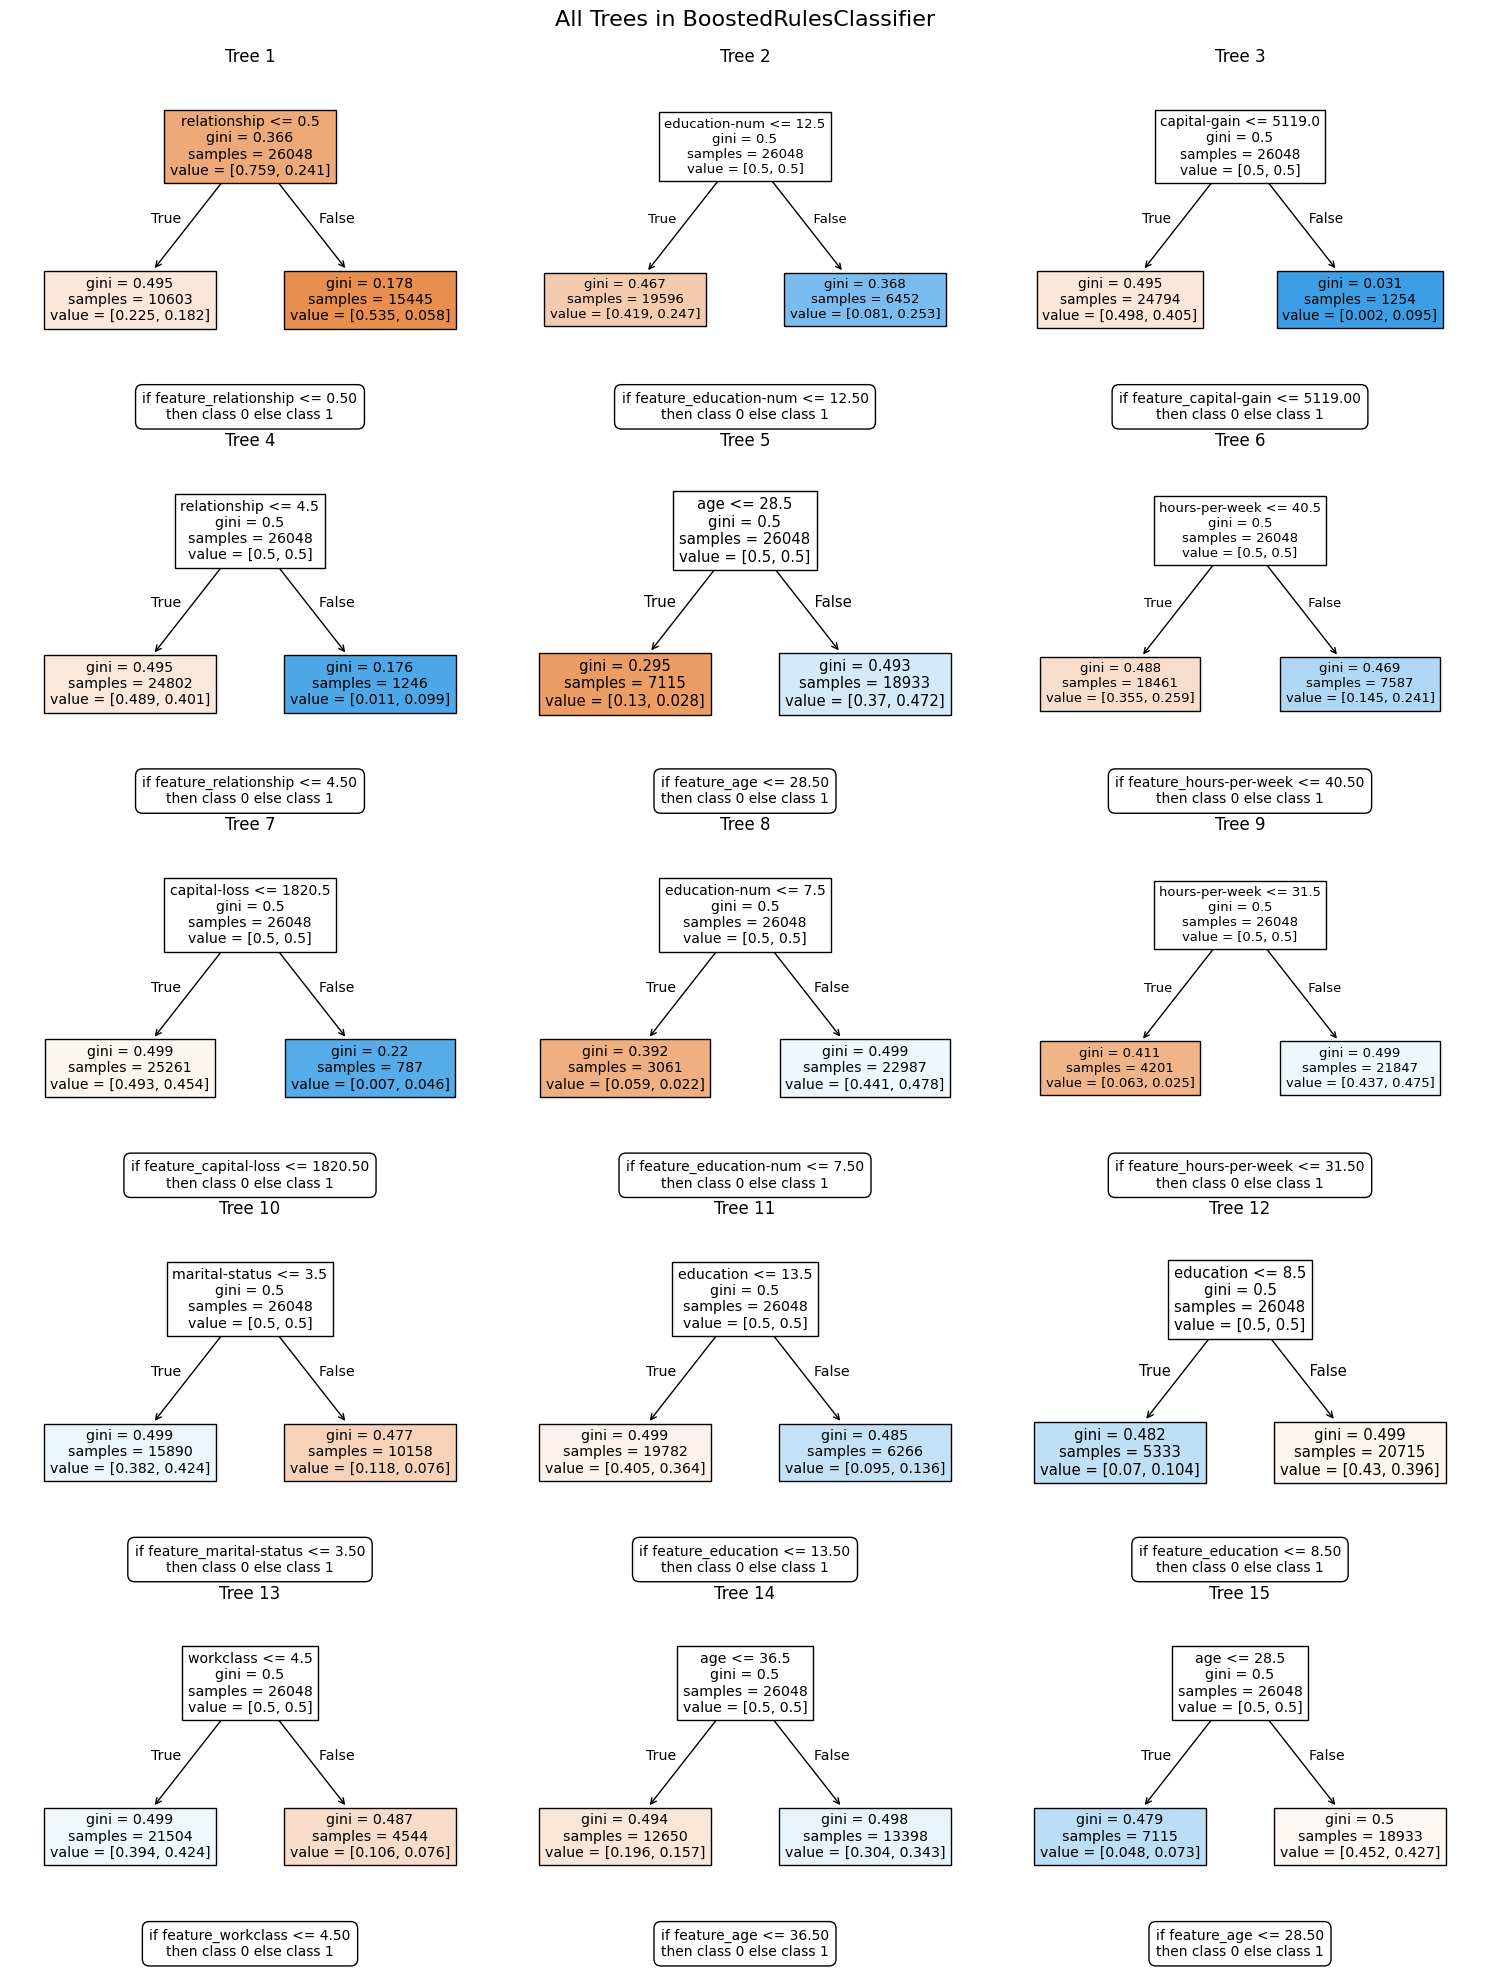

Tree 0: if relationship <= 0.50 then class 0 else class 1 (weight: 1.0000)
Tree 1: if education-num <= 12.50 then class 0 else class 1 (weight: 1.0000)
Tree 2: if capital-gain <= 5119.00 then class 0 else class 1 (weight: 1.0000)
Tree 3: if relationship <= 4.50 then class 0 else class 1 (weight: 1.0000)
Tree 4: if age <= 28.50 then class 0 else class 1 (weight: 1.0000)
Tree 5: if hours-per-week <= 40.50 then class 0 else class 1 (weight: 1.0000)
Tree 6: if capital-loss <= 1820.50 then class 0 else class 1 (weight: 1.0000)
Tree 7: if education-num <= 7.50 then class 0 else class 1 (weight: 1.0000)
Tree 8: if hours-per-week <= 31.50 then class 0 else class 1 (weight: 1.0000)
Tree 9: if marital-status <= 3.50 then class 0 else class 1 (weight: 1.0000)
Tree 10: if education <= 13.50 then class 0 else class 1 (weight: 1.0000)
Tree 11: if education <= 8.50 then class 0 else class 1 (weight: 1.0000)
Tree 12: if workclass <= 4.50 then class 0 else class 1 (weight: 1.0000)
Tree 13: if age <= 36

In [126]:
# tress illustration
n_estimators = 15
n_rows = 5
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle("All Trees in BoostedRulesClassifier", fontsize=16)


axes = axes.ravel()

# plot each tree
for i, (estimator, ax) in enumerate(zip(clf.estimators_, axes)):
    plot_tree(estimator, filled=True, feature_names=feat_names, ax=ax)
    ax.set_title(f"Tree {i+1}")
    
    # extract and display decision rules
    feature = estimator.tree_.feature[0]
    threshold = estimator.tree_.threshold[0]
    rule = f"if feature_{feat_names[feature]} <= {threshold:.2f}\nthen class 0 else class 1"
    ax.text(0.5, -0.1, rule, ha='center', va='center', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # 为总标题留出空间
plt.show()

# print decision rules and weights for each tree
for i, estimator in enumerate(clf.estimators_):
    feature = estimator.tree_.feature[0]
    threshold = estimator.tree_.threshold[0]
    weight = clf.estimator_weights_[i]
    print(f"Tree {i}: if {feat_names[feature]} <= {threshold:.2f} then class 0 else class 1 (weight: {weight:.4f})")

# 

Alternative visualization:


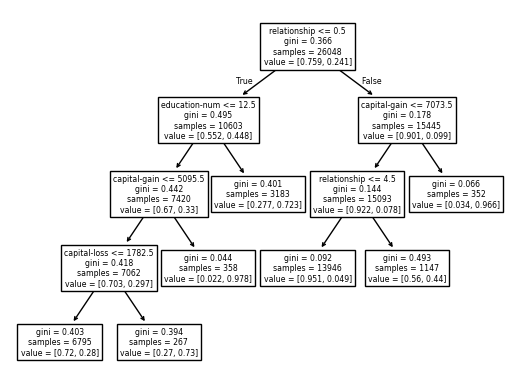

<Figure size 30000x30000 with 0 Axes>

In [89]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
from imodels import SLIMClassifier, OneRClassifier, BoostedRulesClassifier, FIGSClassifier, HSTreeClassifierCV
import matplotlib.pyplot as plt
dt = HSTreeClassifierCV(max_leaf_nodes=7)
dt.fit(X_train.values, y_train.values, feature_names=feat_names)
print('Alternative visualization:')
plot_tree(dt.estimator_, feature_names=feat_names)
# plt.savefig('tree.pdf')
plt.figure(figsize=(100,100), dpi  = 300)
plt.show()